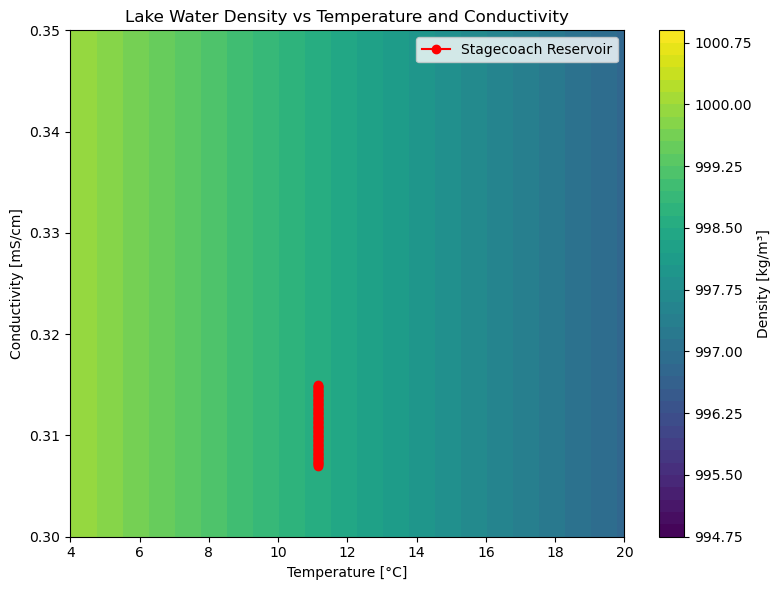

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def lake_water_density(temp_C, cond_mS_cm):
    """
    Estimate lake water density based on temperature (°C) and conductivity (mS/cm).
    
    Parameters:
        temp_C: Temperature in °C (scalar or array)
        cond_mS_cm: Conductivity in mS/cm (scalar or array)
    
    Returns:
        Density in kg/m³
    """
    rho_0 = 1000           # Reference density of freshwater at 4°C [kg/m³]
    alpha = 2e-4           # Thermal expansion coefficient [°C⁻¹]
    beta = 0.8             # Salinity influence coefficient
    T0 = 4                 # Reference temperature [°C]
    salinity = 0.012 * cond_mS_cm  # Estimate salinity from conductivity [g/kg]
    
    density = rho_0 * (1 - alpha * (temp_C - T0) + beta * salinity / 1000)
    return density

# Create a grid for general density surface
temp_vals = np.linspace(0, 30, 100)        # Temperature range (°C)
cond_vals = np.linspace(0, 2, 100)         # Conductivity range (mS/cm)
T, C = np.meshgrid(temp_vals, cond_vals)   # Meshgrid for surface
rho = lake_water_density(T, C)             # Compute density

# Stagecoach Reservoir values
stagecoach_temp = 11.15                                # °C
stagecoach_cond = np.linspace(307, 315, 100) / 1000    # Convert µS/cm to mS/cm
stagecoach_density = lake_water_density(stagecoach_temp, stagecoach_cond)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(T, C, rho, levels=50, cmap="viridis")
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Density [kg/m³]')

# Plot Stagecoach data
ax.plot([stagecoach_temp]*len(stagecoach_cond), stagecoach_cond, 'ro-', label='Stagecoach Reservoir')

# Labels and legend
ax.set_title('Lake Water Density vs Temperature and Conductivity')
ax.set_xlim(4, 20)
ax.set_xlabel('Temperature [°C]')
ax.set_ylim(.3, .35)
ax.set_ylabel('Conductivity [mS/cm]')
ax.legend()
plt.tight_layout()
plt.show()
